In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Problem 1

This is to solve the quadratic equation using the quadratic equation $ax^2 + bx + c = 0$

$$x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

In [2]:
def quadr1(a,b,c):
    x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    return x1,x2

In [3]:
x1,x2 = quadr1(1e-3,1000,1e-3)
print(x1,x2)

-9.999894245993346e-07 -999999.999999


Now we will use the formula

$$ x = \frac{2c}{-b \mp \sqrt{b^2-4ac}}$$

In [4]:
def quadr2(a,b,c):
    x1 = 2*c / (-b - np.sqrt(b**2 - 4*a*c))
    x2 = 2*c / (-b + np.sqrt(b**2 - 4*a*c))
    return x1,x2

In [5]:
x1,x2 = quadr2(1e-3,1000,1e-3)
print(x1,x2)

-1.000000000001e-06 -1000010.5755125057


Due to the limited memory of a 64-bit floating point, we have inherent inaccuracies with out solution; however, we had an accurate $x_2$ for the first quadratic and an accurate $x_1$ for the second.

In [6]:
def quadr3(a,b,c):
    x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    x1 = 2*c / (-b - np.sqrt(b**2 - 4*a*c))
    return x1,x2

In [7]:
x1,x2 = quadr3(1e-3,1000,1e-3)
print(x1,x2)

-1.000000000001e-06 -999999.999999


# Problem 2

For this we will calculate the integral

$$ C_V(T) = 9V\rho k_B \left(\frac{T}{\Theta_D}\right)^3 \int_0^{\Theta_D / T} \frac{x^4e^x}{(e^x-1)^2}dx $$

using the trapezoidal method of integration.

In [8]:
def TrapIntegration(lowbound, highbound, f, q):
    dq = q[1] - q[0]
    integral = 0.5*dq* (f(highbound) + f(lowbound))
    mask = (q <= highbound) & (q>= lowbound)
    q = q[mask]
    N = np.size(q)
    for i in range(1,N-1):
        integral += dq*f(lowbound + i*dq)
    return integral

In [9]:
def bigfunction(r):
    return r**4*np.exp(r) / (np.exp(r) - 1)**2
theta = np.linspace(1e-1,2,1e3)
integr = TrapIntegration(1e-3,np.pi,bigfunction,theta)
(integr-4.4)/4.4
integr

1.9259905918665519

In [10]:
# Test integration on a simple function
x = np.linspace(0,2*np.pi,1000)
dx = x[1] - x[0]
def w(q):
    return np.sin(q)
integral = TrapIntegration(0,np.pi,w,x)

In [11]:
def bigfuction(q): #defining the integrated function
        return q**4 * np.exp(q) / (np.exp(q) - 1)**2

In [12]:
THETAD = 428 #K
V = 1
RHO = 6.22e28 #m^-3
KB = 1.380649e-23 # J/K
def bigfuction(q):
        return q**4 * np.exp(q) / (np.exp(q) - 1)**2
def cv(T): #holding volume constant
    x = np.linspace(0,THETAD/T,1000) #defining an x linspace of 1000 values
    integral = TrapIntegration(3e-3,THETAD/T,bigfunction,x) #using the trapezoidal integral function
    cvt = 9*V*RHO*KB*(T / THETAD)**3 * integral #multiplying the outside factors by the integral
    return cvt

In [13]:
N = 1000 #The amount of iterations we go over
Tmin = 1e-3 #Can't do 0 K
Tmax = 500
dT = 0.5 #Change in temperature
cvts = [] #Making a list of CV(T)
for i in range(N):
    t = Tmin + i*dT
    cvts.append(cv(t)) #Appending the list of CV(T)
    print(i) #Keeping track of iteration count

/home/jovazquez2000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/jovazquez2000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/jovazquez2000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
CVTS = [] # Initializing a list of new CVTS
T = []
for i in range(2,len(cvts)): #The first two values of CV(T0) = CV(T1) = nan
    CVTS.append(cvts[i]) 
CVTS = np.array(CVTS)

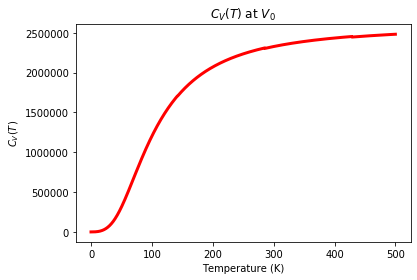

In [15]:
T = np.linspace(3e-3,500,998)
plt.plot(T,CVTS, 'r-',linewidth=3, )
plt.xlabel("Temperature (K)")
plt.ylabel("$C_V(T)$")
plt.title("$C_V(T)$ at $V_0$")
plt.savefig("HW_8_Fig.svg")
plt.show()